DWDM PROJECT

*Importing required modules*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")


*A small subset of data-set*

In [2]:
df = pd.read_csv(r"D:\3-1\Theory\F2 DWDM\project\data.csv")
df.head(10)

,mandal,date,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Shaikpet,01-01-2018,0.0,17.4,30.30,40.6,85.0,0.0,4.8
1,Shaikpet,02-01-2018,0.0,19.4,31.60,37.5,74.9,0.0,8.5
2,Shaikpet,03-01-2018,0.0,19.3,29.90,43.8,86.4,0.0,8.0
3,Shaikpet,04-01-2018,0.0,18.2,29.30,41.6,80.9,0.0,7.0
4,Shaikpet,05-01-2018,0.0,17.1,28.00,42.9,71.2,0.0,11.2
5,Shaikpet,06-01-2018,0.0,15.9,29.30,37.5,76.8,0.0,7.3
6,Shaikpet,07-01-2018,0.0,17.2,29.90,35.5,74.4,0.0,7.1
7,Shaikpet,08-01-2018,0.0,16.9,27.89,40.9,74.6,0.0,10.3
8,Shaikpet,09-01-2018,0.0,17.3,26.70,42.7,81.6,0.0,9.8
9,Shaikpet,10-01-2018,0.0,17.4,26.40,51.2,77.8,0.0,13.2


*Statistics of the data-set*

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35042 entries, 0 to 35041
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mandal          35042 non-null  object 
 1   date            35042 non-null  object 
 2   rainfall        35042 non-null  float64
 3   temp_min        35042 non-null  float64
 4   temp_max        35042 non-null  float64
 5   humidity_min    35042 non-null  float64
 6   humidity_max    35042 non-null  float64
 7   wind_speed_min  34001 non-null  float64
 8   wind_speed_max  34977 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
count,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000,34001.000000,34977.000000
mean,2.736562,23.189849,33.593165,42.558944,80.437477,0.385418,10.433857
std,9.082997,3.474841,3.941404,18.773714,16.168133,1.056075,11.976747
min,0.000000,6.000000,19.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.500000,30.900000,27.300000,71.200000,0.000000,4.400000
50%,0.000000,23.500000,33.000000,42.000000,83.700000,0.000000,7.900000
75%,0.100000,25.200000,36.400000,56.000000,92.400000,0.100000,11.800000
max,149.700000,33.300000,44.800000,99.300000,100.000000,15.500000,234.400000


*Removing duplicate records*

AS there are no null values we are skiping the step which fills the null values

In [4]:
df = df.drop_duplicates()

*Counting null values of each attribute in the data-set*

In [5]:
df.isnull().sum()

mandal               0
date                 0
rainfall             0
temp_min             0
temp_max             0
humidity_min         0
humidity_max         0
wind_speed_min    1041
wind_speed_max      65
dtype: int64

*Replacing the null values with the mean*

In [6]:
df["wind_speed_max"]=df["wind_speed_max"].fillna(df["wind_speed_max"].mean())
df["wind_speed_min"]=df["wind_speed_min"].fillna(df["wind_speed_min"].mean())
# df = df.drop(columns=['wind_speed_min'])

*Statistics of data-set*

In [7]:
df.describe()

,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
count,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000
mean,2.736562,23.189849,33.593165,42.558944,80.437477,0.385418,10.433857
std,9.082997,3.474841,3.941404,18.773714,16.168133,1.040270,11.965633
min,0.000000,6.000000,19.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.500000,30.900000,27.300000,71.200000,0.000000,4.400000
50%,0.000000,23.500000,33.000000,42.000000,83.700000,0.000000,7.900000
75%,0.100000,25.200000,36.400000,56.000000,92.400000,0.200000,11.800000
max,149.700000,33.300000,44.800000,99.300000,100.000000,15.500000,234.400000


*Box plot of temp_min vs temp_max*

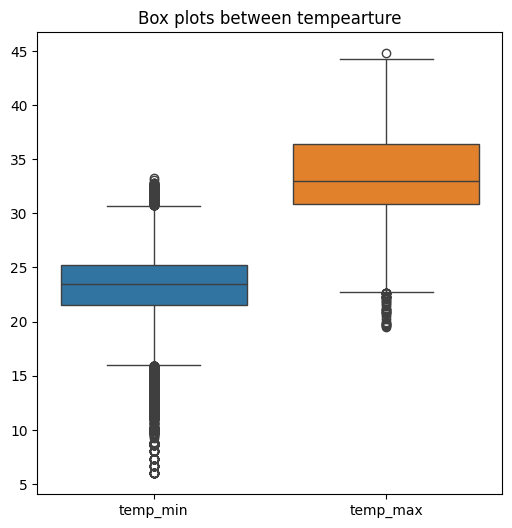

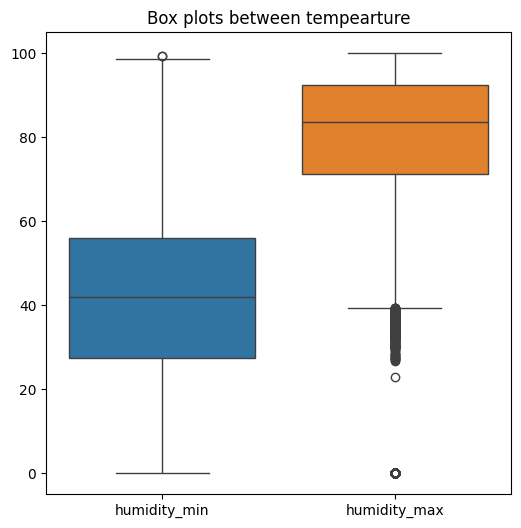

In [8]:

plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['temp_min','temp_max']])
plt.title("Box plots between tempearture")
plt.show()
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['humidity_min','humidity_max']])
plt.title("Box plots between tempearture")
plt.show()

*Removing the outliers*

In [9]:
# def winsorize_outliers(df, columns, lower_quantile=0.05, upper_quantile=0.95):
#     for column in columns:
#         lower_bound = df[column].quantile(lower_quantile)
#         upper_bound = df[column].quantile(upper_quantile)
#         df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#         df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
#     return df


# columns_to_clean = ["rainfall", "temp_min", "temp_max", "humidity_min", "humidity_max", "wind_speed_min", "wind_speed_max"]
# df= winsorize_outliers(df, columns_to_clean)


In [10]:
def iqr_outlier_handling(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_clean = ["rainfall", "temp_min", "temp_max", "humidity_min", "humidity_max", "wind_speed_min", "wind_speed_max"]
df = iqr_outlier_handling(df, columns_to_clean)

*Box plot after the removal of outliers*

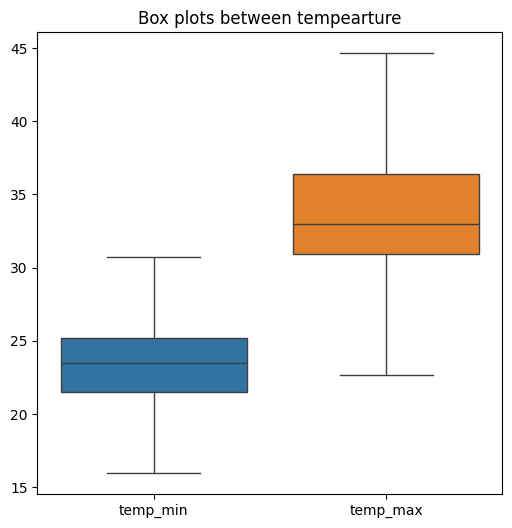

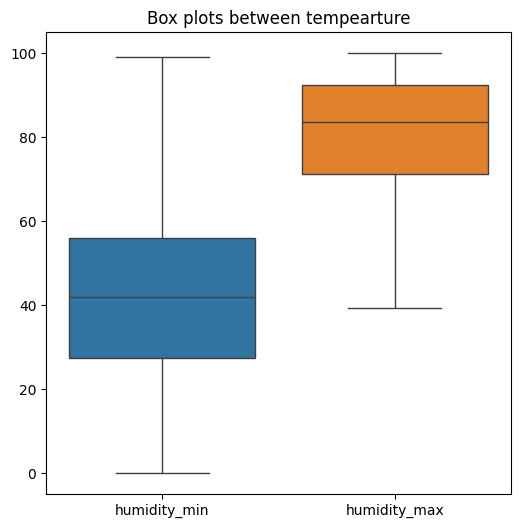

In [11]:

plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['temp_min','temp_max']])
plt.title("Box plots between tempearture")
plt.show()
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['humidity_min','humidity_max']])
plt.title("Box plots between tempearture")
plt.show()




*Predicting the type of weather*

In [12]:
def categorize_weather(row):
    rainfall = row['rainfall']
    humidity_min = row['humidity_min']
    wind_speed_max = row['wind_speed_max']
    
    if rainfall == 0 and humidity_min < 50:
        return 'Sunny'
    elif rainfall == 0 and 50 <= humidity_min < 70:
        return 'Partly Sunny'
    elif rainfall == 0 and humidity_min >= 70:
        return 'Partly Cloudy'
    elif 0 < rainfall <= 10 and humidity_min > 60:
        return 'Sun and Rain'
    elif rainfall > 10 and humidity_min > 70:
        return 'Heavy Raining'
    elif 1 <= rainfall <= 10 and humidity_min > 60:
        return 'Light Raining'
    elif rainfall > 10 and humidity_min > 80 and wind_speed_max > 15:
        return 'Thunderstorms'
    elif rainfall == 0 and humidity_min > 60:
        return 'Cloudy'
    elif wind_speed_max > 15:
        return 'Windy'
    elif rainfall <= 1 and 50 <= humidity_min < 70:
        return 'Rainbow'
    else:
        return 'Clear' 


df['weather_type'] = df.apply(categorize_weather, axis=1)


print(df[['rainfall', 'humidity_min', 'temp_min', 'wind_speed_max', 'weather_type']].head())


   rainfall  humidity_min  temp_min  wind_speed_max weather_type
0       0.0          40.6      17.4             4.8        Sunny
1       0.0          37.5      19.4             8.5        Sunny
2       0.0          43.8      19.3             8.0        Sunny
3       0.0          41.6      18.2             7.0        Sunny
4       0.0          42.9      17.1            11.2        Sunny


*Summarization of the data-set*

In [13]:
df.describe()

,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
count,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000,35042.000000
mean,0.063146,23.274716,33.594616,42.558933,80.756842,0.118944,8.746330
std,0.107586,3.189836,3.936952,18.773680,14.949620,0.196009,5.735108
min,0.000000,15.950000,22.650000,0.000000,39.400000,0.000000,0.000000
25%,0.000000,21.500000,30.900000,27.300000,71.200000,0.000000,4.400000
50%,0.000000,23.500000,33.000000,42.000000,83.700000,0.000000,7.900000
75%,0.100000,25.200000,36.400000,56.000000,92.400000,0.200000,11.800000
max,0.250000,30.750000,44.650000,99.050000,100.000000,0.500000,22.900000


*Finding the Accuracy of Rainfall using Stacking, Random forest, XG Boost and GradientBoost Models*

RAINFALL(Stacking,Random forest,XGboost,GradientBoost)

In [14]:
X = df.drop(columns=['rainfall', 'mandal', 'date', 'weather_type'])
y = df['rainfall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

estimators = [
    ('rf', rf),
    ('xgb', xgb),
    ('gb', gb)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)

y_pred_stacking = stacking_regressor.predict(X_test)

rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
accuracy_stacking = r2_score(y_test, y_pred_stacking) * 100

print(f'Accuracy (R^2 Score) for Stacking rainfall prediction: {accuracy_stacking:.2f}%')

Accuracy (R^2 Score) for Stacking rainfall prediction: 50.33%


*Finding the Accuracy of temp_max using Random forest Model*

temp_max(Random forest)

In [15]:
X = df.drop(columns=['temp_max', 'mandal', 'date', 'weather_type'])
y = df['temp_max']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_temp_max = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for temp_max prediction: {accuracy_temp_max:.2f}%')


Accuracy (R^2 Score) for temp_max prediction: 87.29%


*Finding the Accuracy of temp_min using Random forest Model*

temp_min(Random forest)

In [16]:
X = df.drop(columns=['temp_min', 'mandal', 'date', 'weather_type'])
y = df['temp_min']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_temp_min = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for temp_min prediction: {accuracy_temp_min:.2f}%')


Accuracy (R^2 Score) for temp_min prediction: 79.54%


*Finding the Accuracy of humidity_min using GradientBoostingRegressor Model*

humidity_min (GradientBoostingRegressor)

In [17]:
X = df.drop(columns=['humidity_min', 'mandal', 'date', 'weather_type'])
y = df['humidity_min']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_humidity_min = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for humidity_min prediction: {accuracy_humidity_min:.2f}%')

Accuracy (R^2 Score) for humidity_min prediction: 87.70%


*Finding the Accuracy of humidity_max using GradientBoostingRegressor Model*

In [18]:
X = df.drop(columns=['humidity_max', 'mandal', 'date', 'weather_type'])
y = df['humidity_max']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_humidity_max = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for humidity_max prediction: {accuracy_humidity_max:.2f}%')

Accuracy (R^2 Score) for humidity_max prediction: 71.46%


*Finding the Accuracy of wind_speed_max using Voting, Random forest, XGboost and GradientBoost Models*

Wind_speed_max(Voting,Random forest,XGboost,GradientBoost)

In [19]:
X = df.drop(columns=['rainfall', 'mandal', 'date', 'weather_type'])
y = df['wind_speed_max']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
xgb = XGBRegressor(n_estimators=100, random_state=42, max_depth=5)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)

voting_regressor = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

y_pred = voting_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_wind_max = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for predicting wind_speed_max: {accuracy_wind_max:.2f}%')


Accuracy (R^2 Score) for predicting wind_speed_max: 100.00%


*Finding the Accuracy of wind_speed_min using Voting, Random forest, XGboost and GradientBoost Models*

Wind_speed_min(Voting,Random forest,XGboost,GradientBoost)

In [20]:
X = df.drop(columns=['rainfall', 'mandal', 'date', 'weather_type'])
y = df['wind_speed_min']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
xgb = XGBRegressor(n_estimators=100, random_state=42, max_depth=5)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)

voting_regressor = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

y_pred = voting_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_wind_min = r2_score(y_test, y_pred) * 100

print(f'Accuracy (R^2 Score) for predicting wind_speed_min: {accuracy_wind_min:.2f}%')


Accuracy (R^2 Score) for predicting wind_speed_min: 100.00%


*Finding the Accuracy of weather_type using DecisionTreeClassifier Model*

In [21]:
X = df.drop(columns=['rainfall', 'mandal', 'date', 'weather_type'])  
y = df['weather_type'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

dt = DecisionTreeClassifier(random_state=42, max_depth=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy for predicting weather_type: {accuracy:.2f}%')


Accuracy for predicting weather_type: 84.37%


*Histogram representation of each and every attribute*

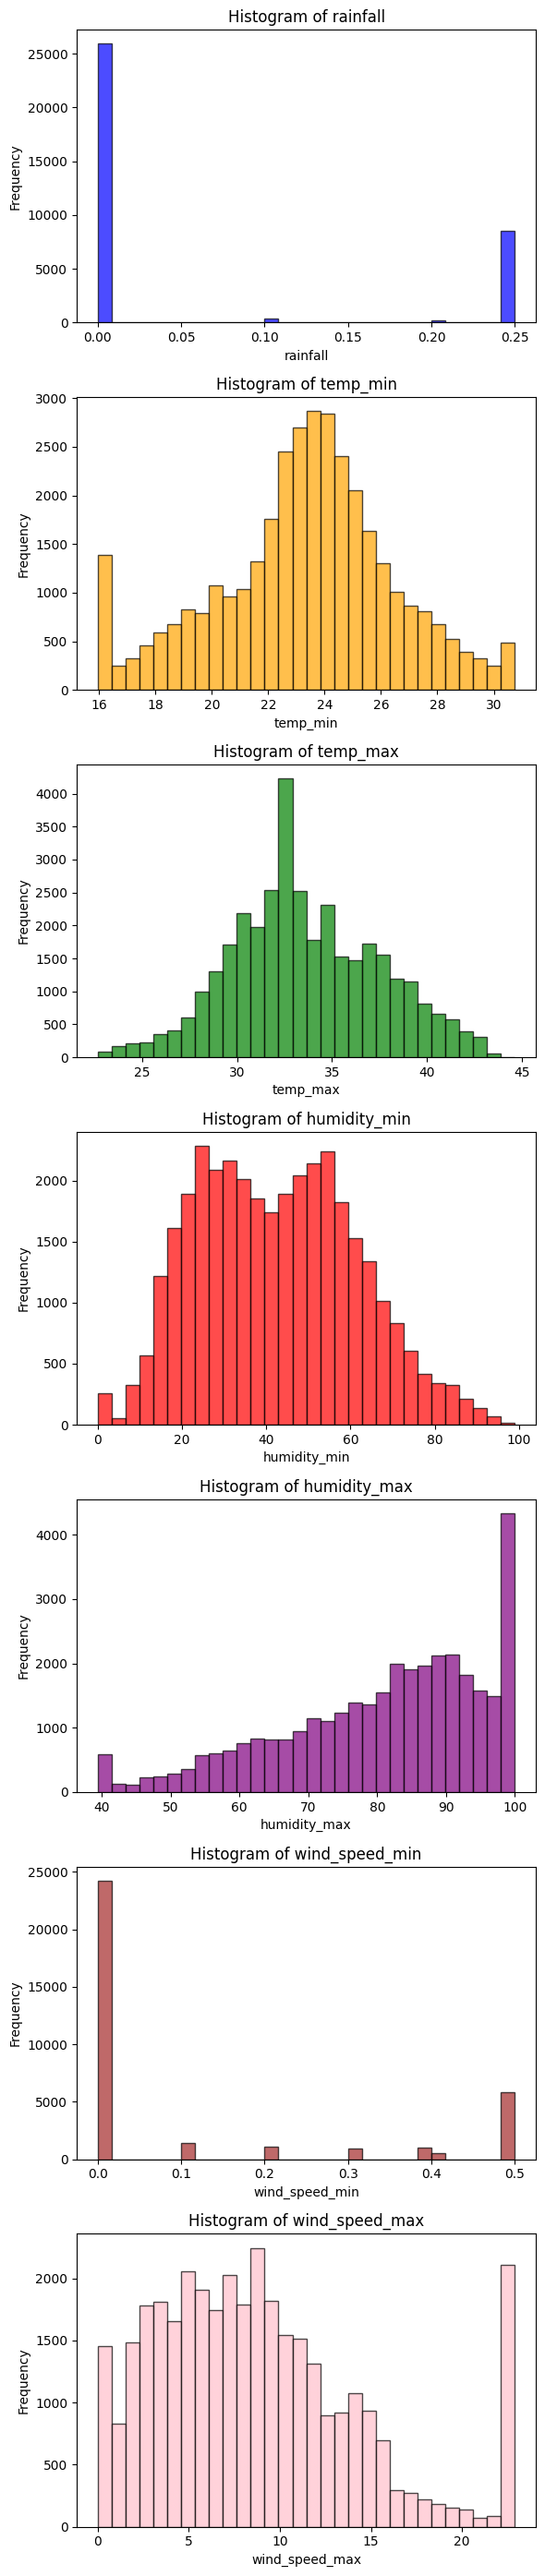

In [22]:
columns_to_plot = ['rainfall', 'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_min', 'wind_speed_max']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']  


n = len(columns_to_plot)
plt.figure(figsize=(6, 4 * n))

for i, (column, color) in enumerate(zip(columns_to_plot, colors), start=1):
    plt.subplot(n, 1, i)
    plt.hist(df[column], bins=30, color=color, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


*Heatmap of Correlation Matrix After Removing Outliers*

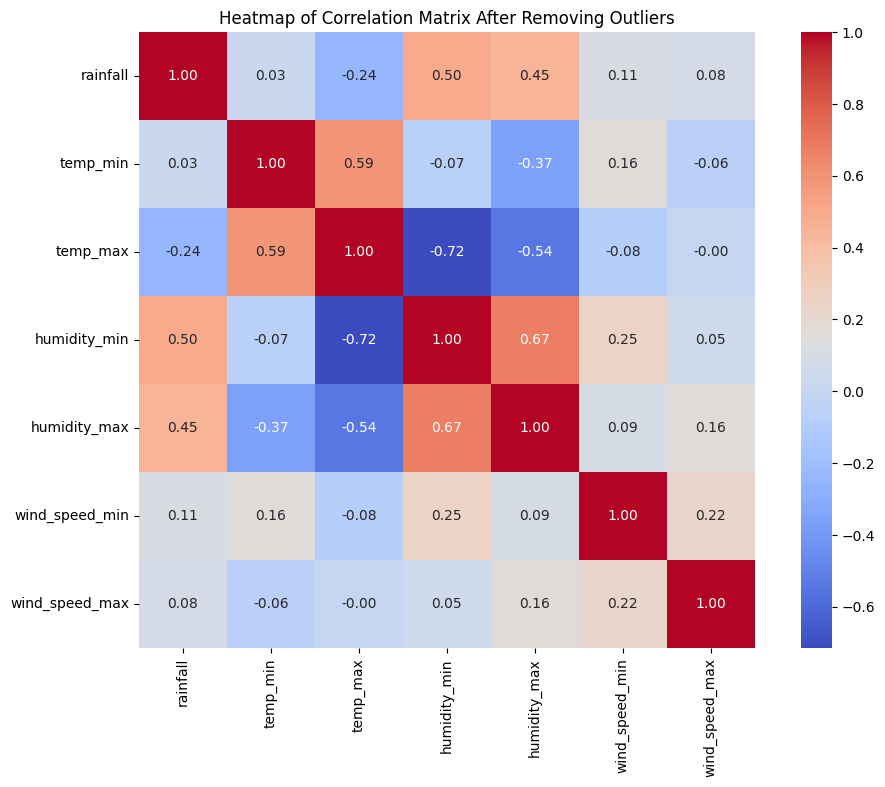

In [23]:
numeric_df = df.select_dtypes(include=['int64','float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap of Correlation Matrix After Removing Outliers')
plt.show()

*Representation of each and every attribute's Accuracy and the model used for it*

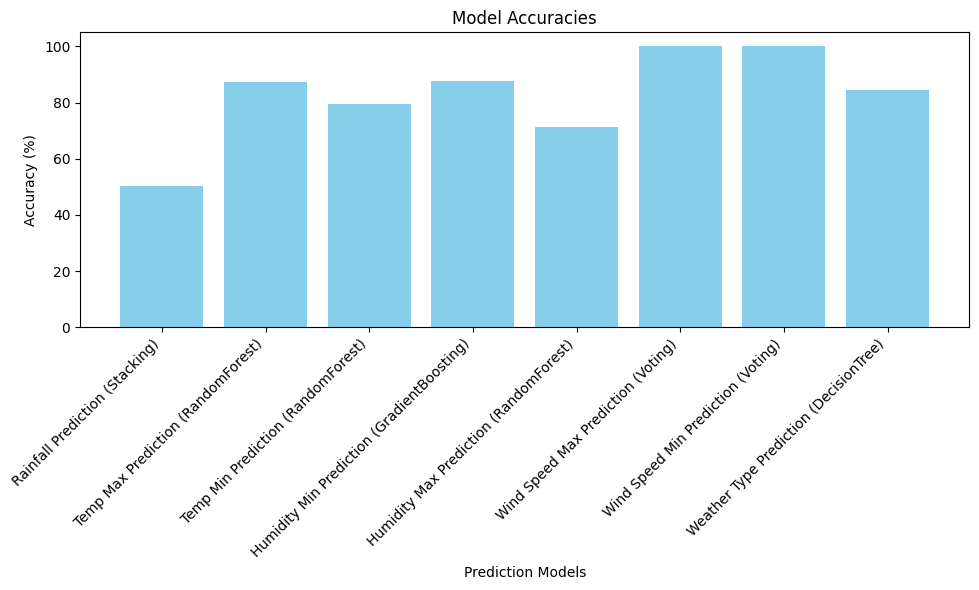

In [24]:
accuracies = {
    'Rainfall Prediction (Stacking)': accuracy_stacking,
    'Temp Max Prediction (RandomForest)': accuracy_temp_max,
    'Temp Min Prediction (RandomForest)': accuracy_temp_min,
    'Humidity Min Prediction (GradientBoosting)': accuracy_humidity_min,
    'Humidity Max Prediction (RandomForest)': accuracy_humidity_max,
    'Wind Speed Max Prediction (Voting)': accuracy_wind_max,
    'Wind Speed Min Prediction (Voting)': accuracy_wind_min,
    'Weather Type Prediction (DecisionTree)': accuracy
}


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(accuracies.keys(), accuracies.values(), color='skyblue')
ax.set_title('Model Accuracies')
ax.set_xlabel('Prediction Models')
ax.set_ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*Plot of all attribute's accuracies together*

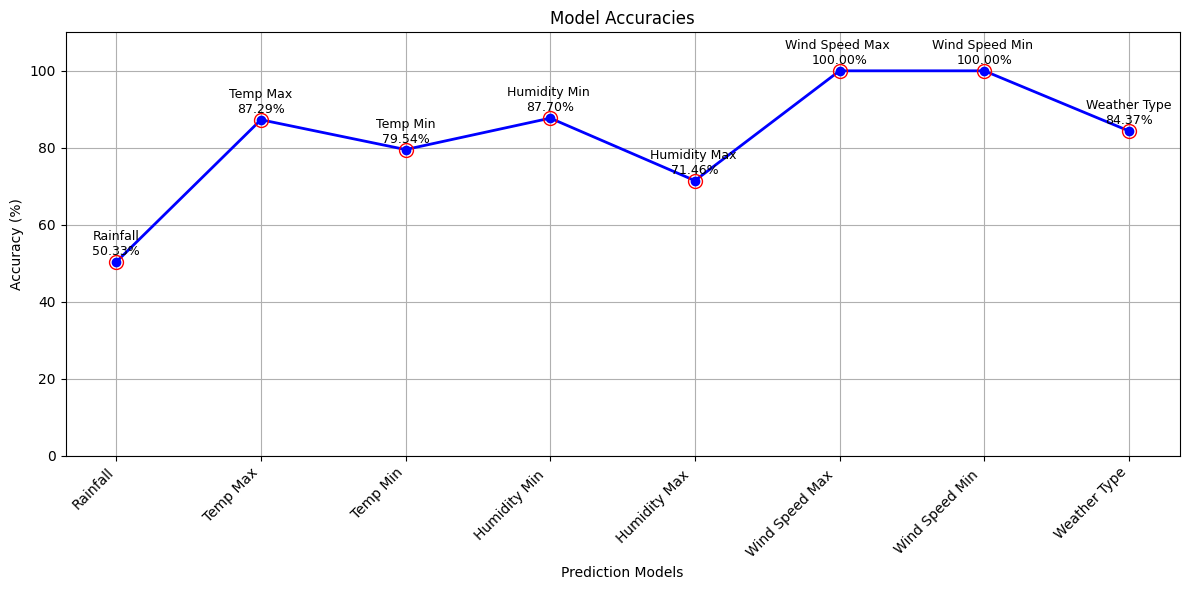

In [25]:
model_names = [
    'Rainfall',
    'Temp Max',
    'Temp Min',
    'Humidity Min ',
    'Humidity Max ',
    'Wind Speed Max ',
    'Wind Speed Min ',
    'Weather Type'
]
accuracies = [
    accuracy_stacking,
    accuracy_temp_max,
    accuracy_temp_min,
    accuracy_humidity_min,
    accuracy_humidity_max,
    accuracy_wind_max,
    accuracy_wind_min,
    accuracy
]


plt.figure(figsize=(12, 6)) 
plt.plot(model_names, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

for i, (model, acc) in enumerate(zip(model_names, accuracies)):
    plt.text(i, acc + 1, f'{model}\n{acc:.2f}%', ha='center', va='bottom', fontsize=9)
    plt.plot(i, acc, marker='o', markersize=10, markerfacecolor='none', markeredgecolor='red')

plt.title('Model Accuracies')
plt.xlabel('Prediction Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110) 
plt.grid(True)
plt.tight_layout() 
plt.show()
